# Fashion MNIST

- 60000枚の訓練データ  
- 10000枚のテストデータ  
- 28x28px 784pxの画像データ(0~255)  

各正解ラベル  

> 0 => T-shirt/top  
> 1 => Trouser  
> 2 => Pullover  
> 3 => Dress  
> 4 => Coat  
> 5 => Sandal  
> 6 => Shirt  
> 7 => Sneaker  
> 8 => Bag  
> 9 => Ankle boot  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import os
print(os.listdir("csv"))

['fashion-mnist_test.csv', 'fashion-mnist_train.csv']


In [2]:
fashion_train_df = pd.read_csv('csv/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('csv/fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Let's check the number of rows and number of columns
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
fashion_test_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
# Create training and testing arrays before fitting into CNN model
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
testing.shape

(10000, 785)

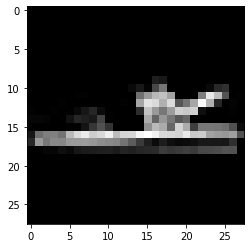

In [11]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [12]:
label = training[i,0]
label

5.0

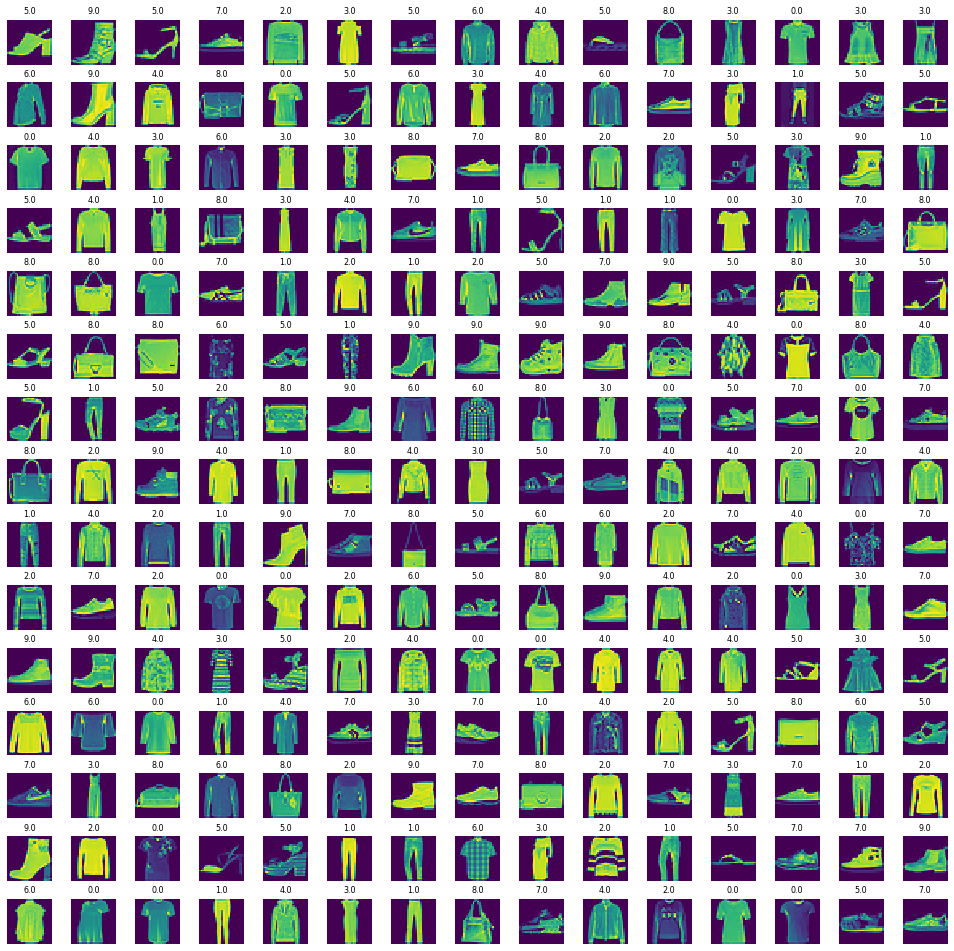

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [14]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.1, random_state = 12345)

In [16]:
X_train.shape

(54000, 784)

In [17]:
y_train.shape

(54000,)

In [18]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
X_train.shape

(54000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(6000, 28, 28, 1)

In [22]:
# Import train_test_split from scikit library
# Import Keras
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.
/Users/d_ando/gizumo/pipenv/.venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/d_ando/gizumo/pipenv/.venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/d_ando/gizumo/pipenv/.venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/d_ando/gizumo/pi

In [23]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,(5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(Conv2D(32,(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(activation = 'relu', units=32))
cnn_model.add(Dense(activation = 'softmax', units=10))
cnn_model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     


In [24]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [27]:
epochs = 10
batch_size=64
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = (X_validate, y_validate), callbacks=[learning_rate_reduction])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 72s - loss: 0.3416 - acc: 0.8746 - val_loss: 0.3027 - val_acc: 0.8883
Epoch 2/10
 - 65s - loss: 0.3102 - acc: 0.8864 - val_loss: 0.2818 - val_acc: 0.8963
Epoch 3/10
 - 72s - loss: 0.2889 - acc: 0.8936 - val_loss: 0.2819 - val_acc: 0.8955
Epoch 4/10
 - 75s - loss: 0.2737 - acc: 0.8993 - val_loss: 0.2659 - val_acc: 0.8978
Epoch 5/10
 - 67s - loss: 0.2590 - acc: 0.9047 - val_loss: 0.2542 - val_acc: 0.9052
Epoch 6/10
 - 75s - loss: 0.2507 - acc: 0.9068 - val_loss: 0.2488 - val_acc: 0.9092
Epoch 7/10
 - 68s - loss: 0.2407 - acc: 0.9101 - val_loss: 0.2436 - val_acc: 0.9107
Epoch 8/10
 - 81s - loss: 0.2310 - acc: 0.9141 - val_loss: 0.2331 - val_acc: 0.9133
Epoch 9/10
 - 77s - loss: 0.2238 - acc: 0.9165 - val_loss: 0.2693 - val_acc: 0.9042
Epoch 10/10
 - 76s - loss: 0.2186 - acc: 0.9189 - val_loss: 0.2456 - val_acc: 0.9112


In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 330us/step
Test Accuracy : 0.916


In [28]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

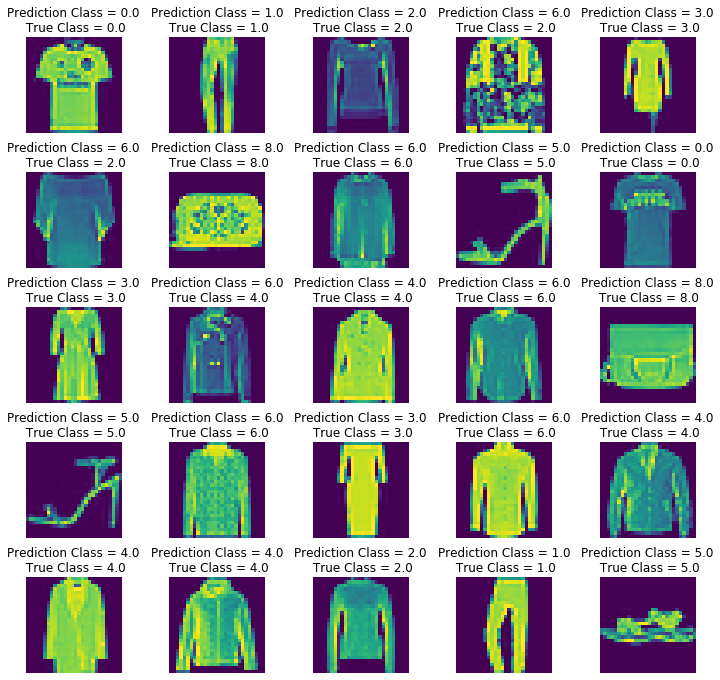

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


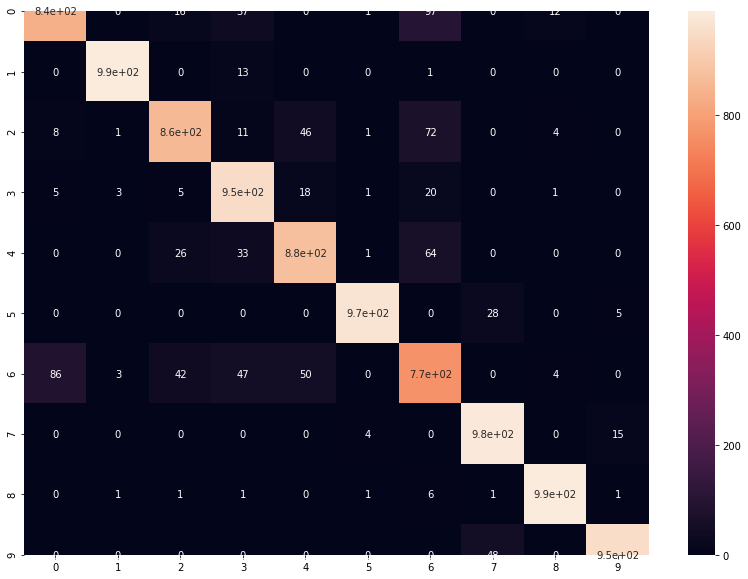

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [32]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.84      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.86      0.88      1000
     Class 3       0.87      0.95      0.91      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.75      0.77      0.76      1000
     Class 7       0.93      0.98      0.95      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



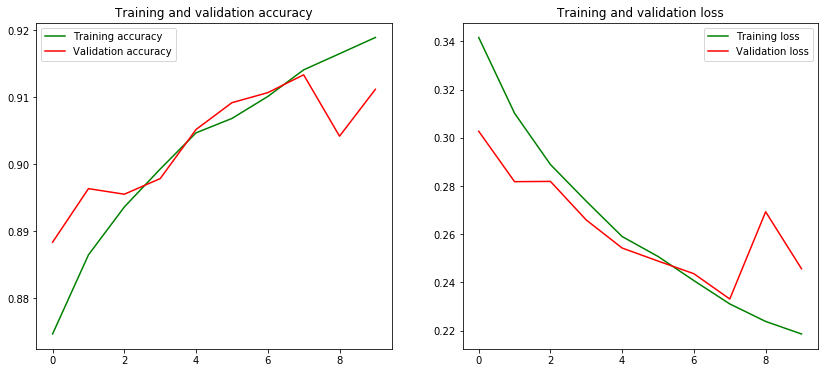

In [33]:
def plot_accuracy_and_loss(history):
    hist = history.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)